In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

mnist = fetch_openml("mnist_784", as_frame=False, parser="auto")
X, y = mnist.data[:5000], mnist.target[:5000]

In [5]:
t_sne = TSNE(n_components=2, init="random", learning_rate="auto")
X_embedded = t_sne.fit_transform(X)

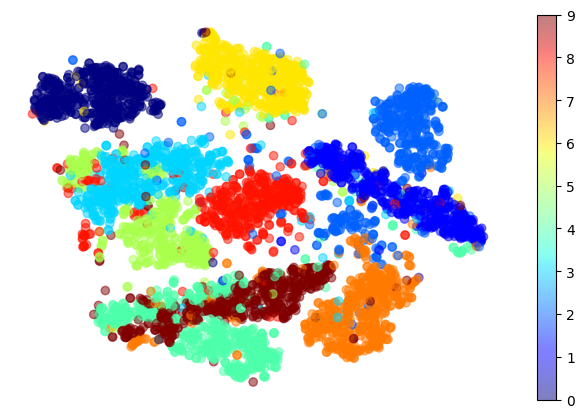

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(
    X_embedded[:, 0], X_embedded[:, 1], c=y.astype(np.int8), cmap="jet", alpha=0.5
)
plt.axis("off")
plt.colorbar()
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10.0, 10.0]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(
            X_normalized[y == digit, 0],
            X_normalized[y == digit, 1],
            c=[cmap(float(digit) / 9)],
            alpha=0.5,
        )
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(
                    image_coord[0],
                    image_coord[1],
                    str(int(y[index])),
                    color=cmap(float(y[index]) / 9),
                    fontdict={"weight": "bold", "size": 16},
                )
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(
                    OffsetImage(image, cmap="binary"), image_coord
                )
                ax.add_artist(imagebox)

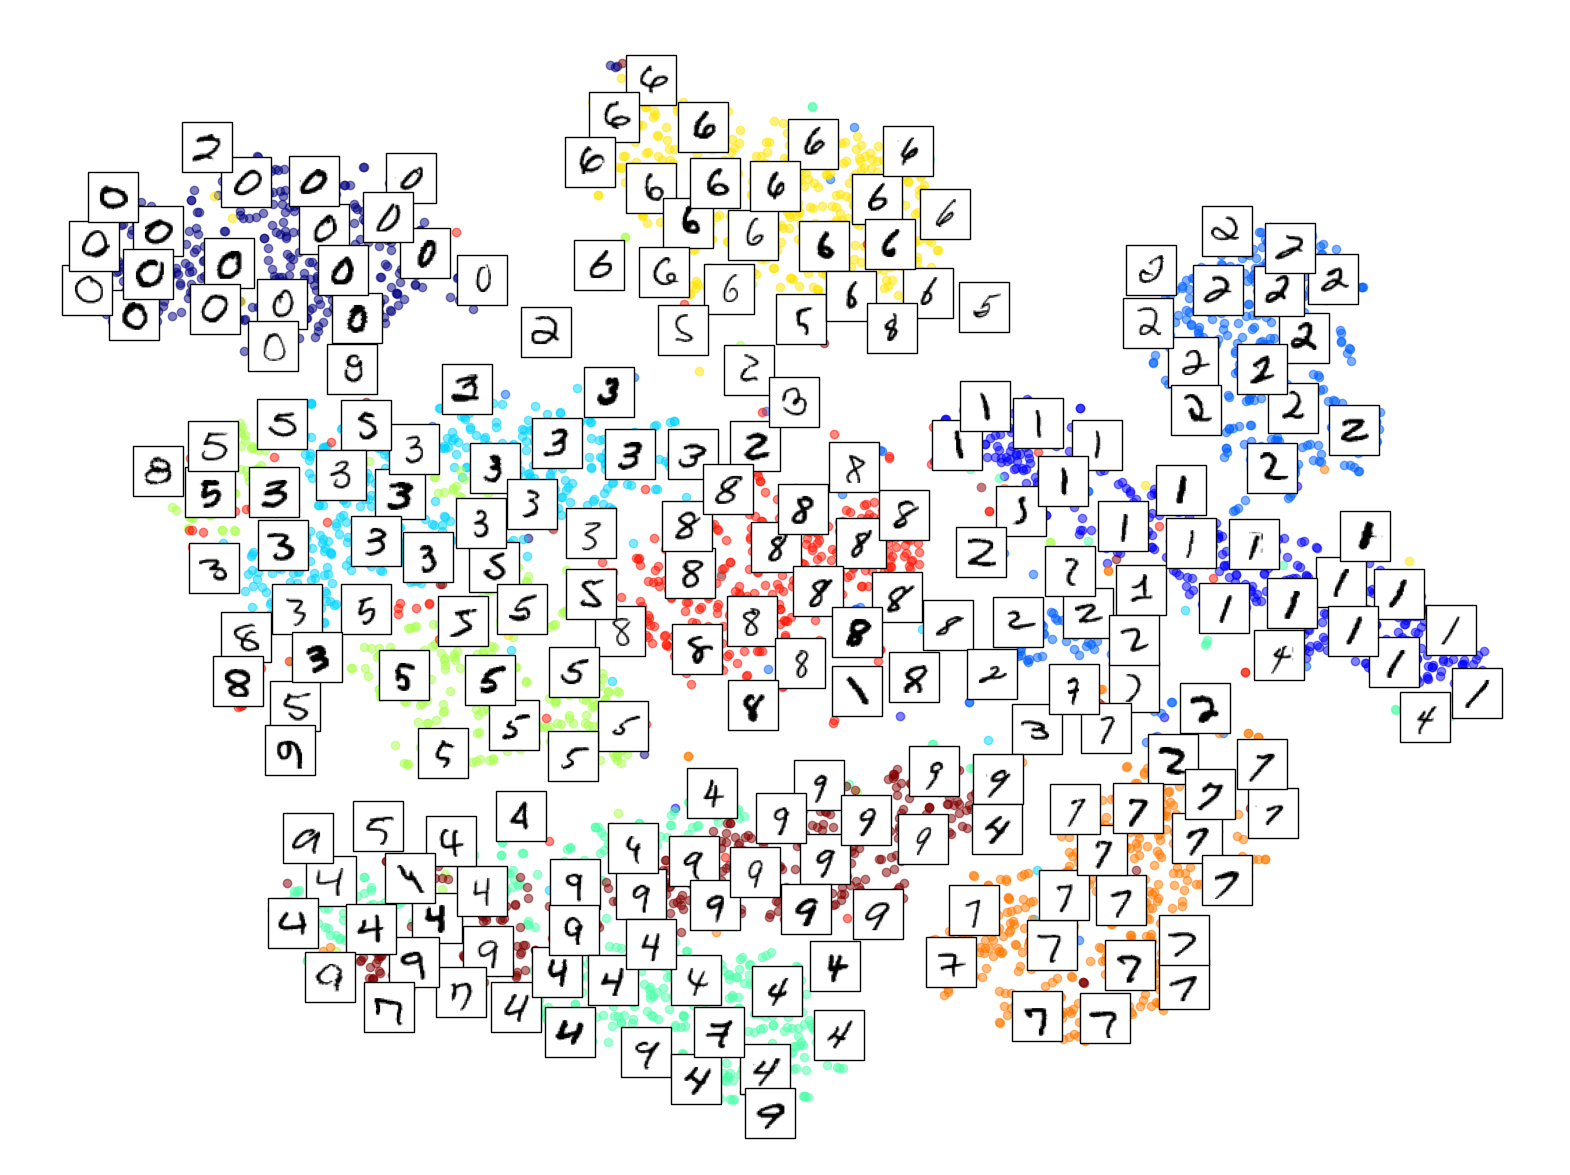

In [21]:
plot_digits(X_embedded, y, images=X, figsize=(20, 15))
plt.show()

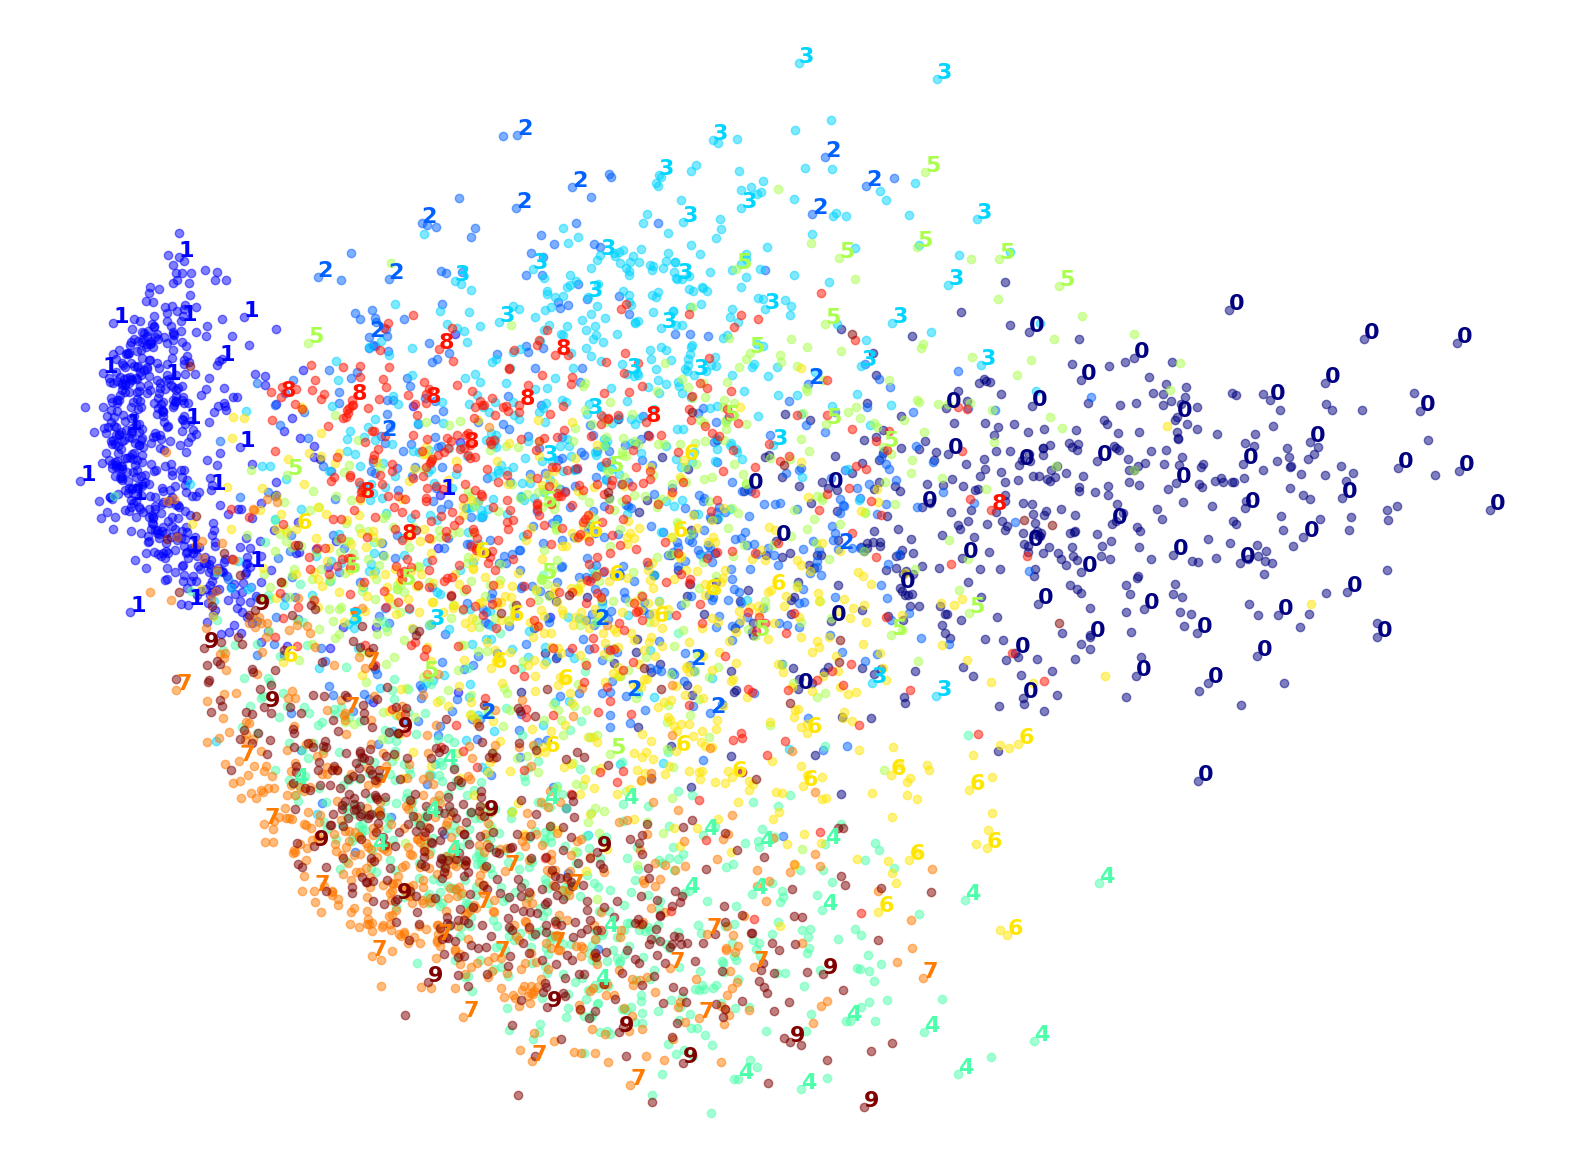

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
plot_digits(X_PCA, y, figsize=(20, 15))
plt.show()

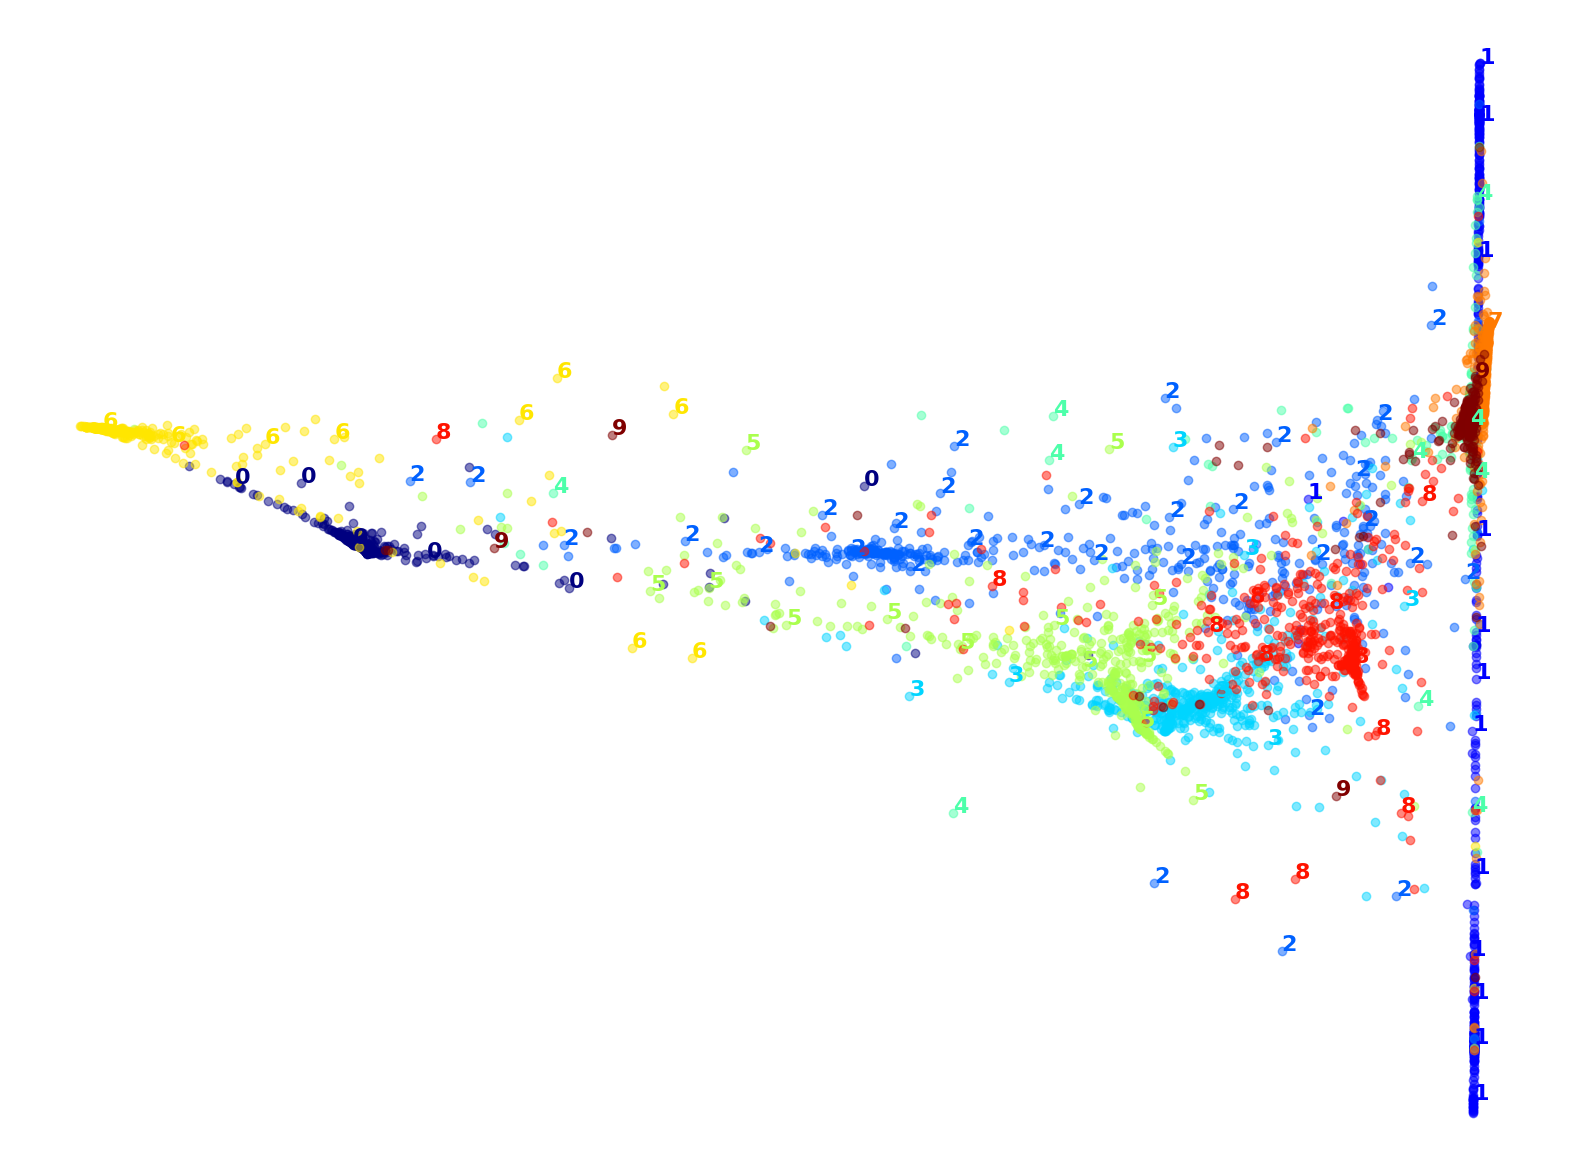

In [24]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
X_LLE = lle.fit_transform(X)
plot_digits(X_LLE, y, figsize=(20, 15))
plt.show()

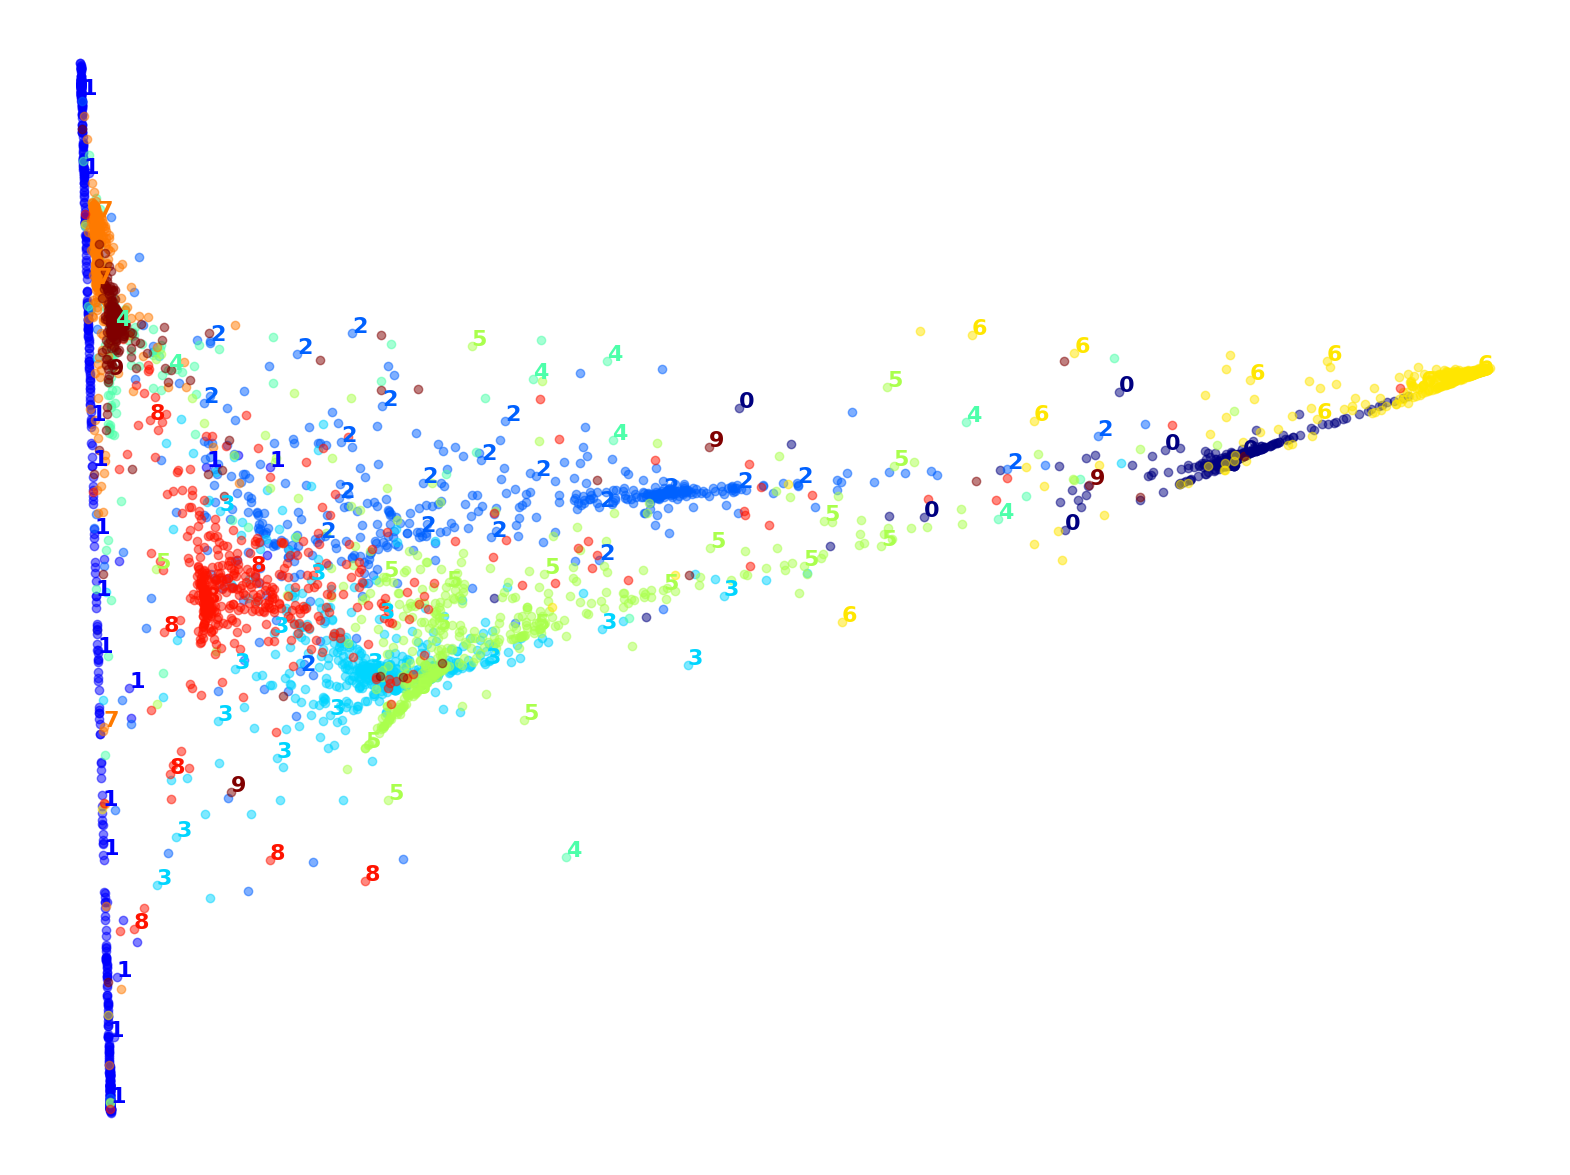

In [25]:
from sklearn.pipeline import make_pipeline

pca_lle = make_pipeline(PCA(n_components=0.95), LocallyLinearEmbedding(n_components=2))
X_PCA_LLE = pca_lle.fit_transform(X)
plot_digits(X_PCA_LLE, y, figsize=(20,15))
plt.show()

f:\Projects\Coding-RasPi\HOML\homl-venv\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


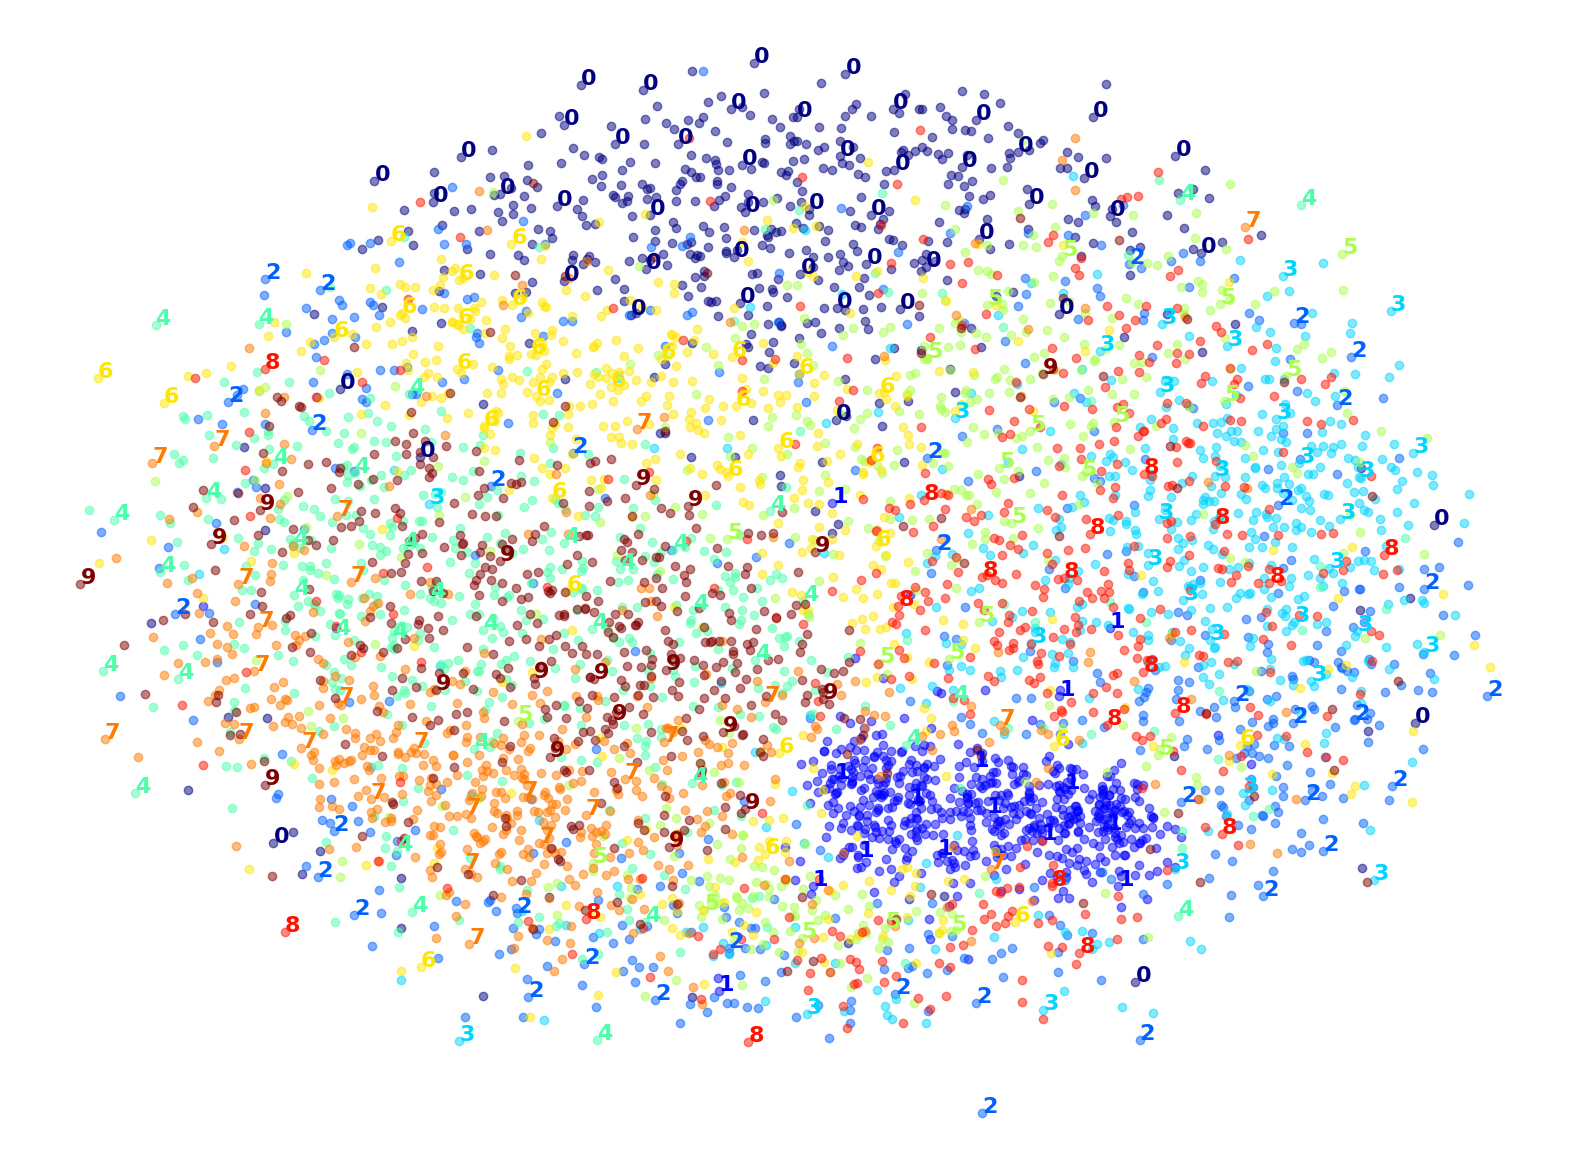

In [26]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)
plot_digits(X_mds, y, figsize=(20,15))
plt.show()

f:\Projects\Coding-RasPi\HOML\homl-venv\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


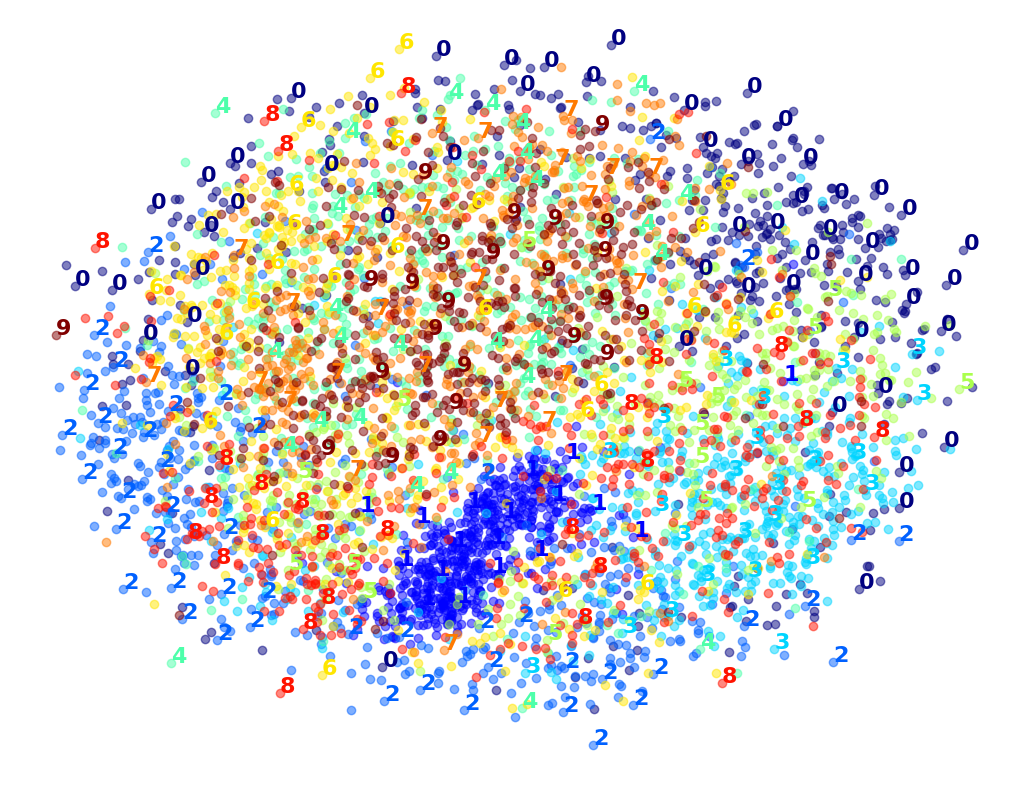

In [27]:
pca_mds = make_pipeline(PCA(n_components=0.95),
                        MDS(n_components=2))

X_pca_mds_reduced = pca_mds.fit_transform(X)
plot_digits(X_pca_mds_reduced, y)
plt.show()

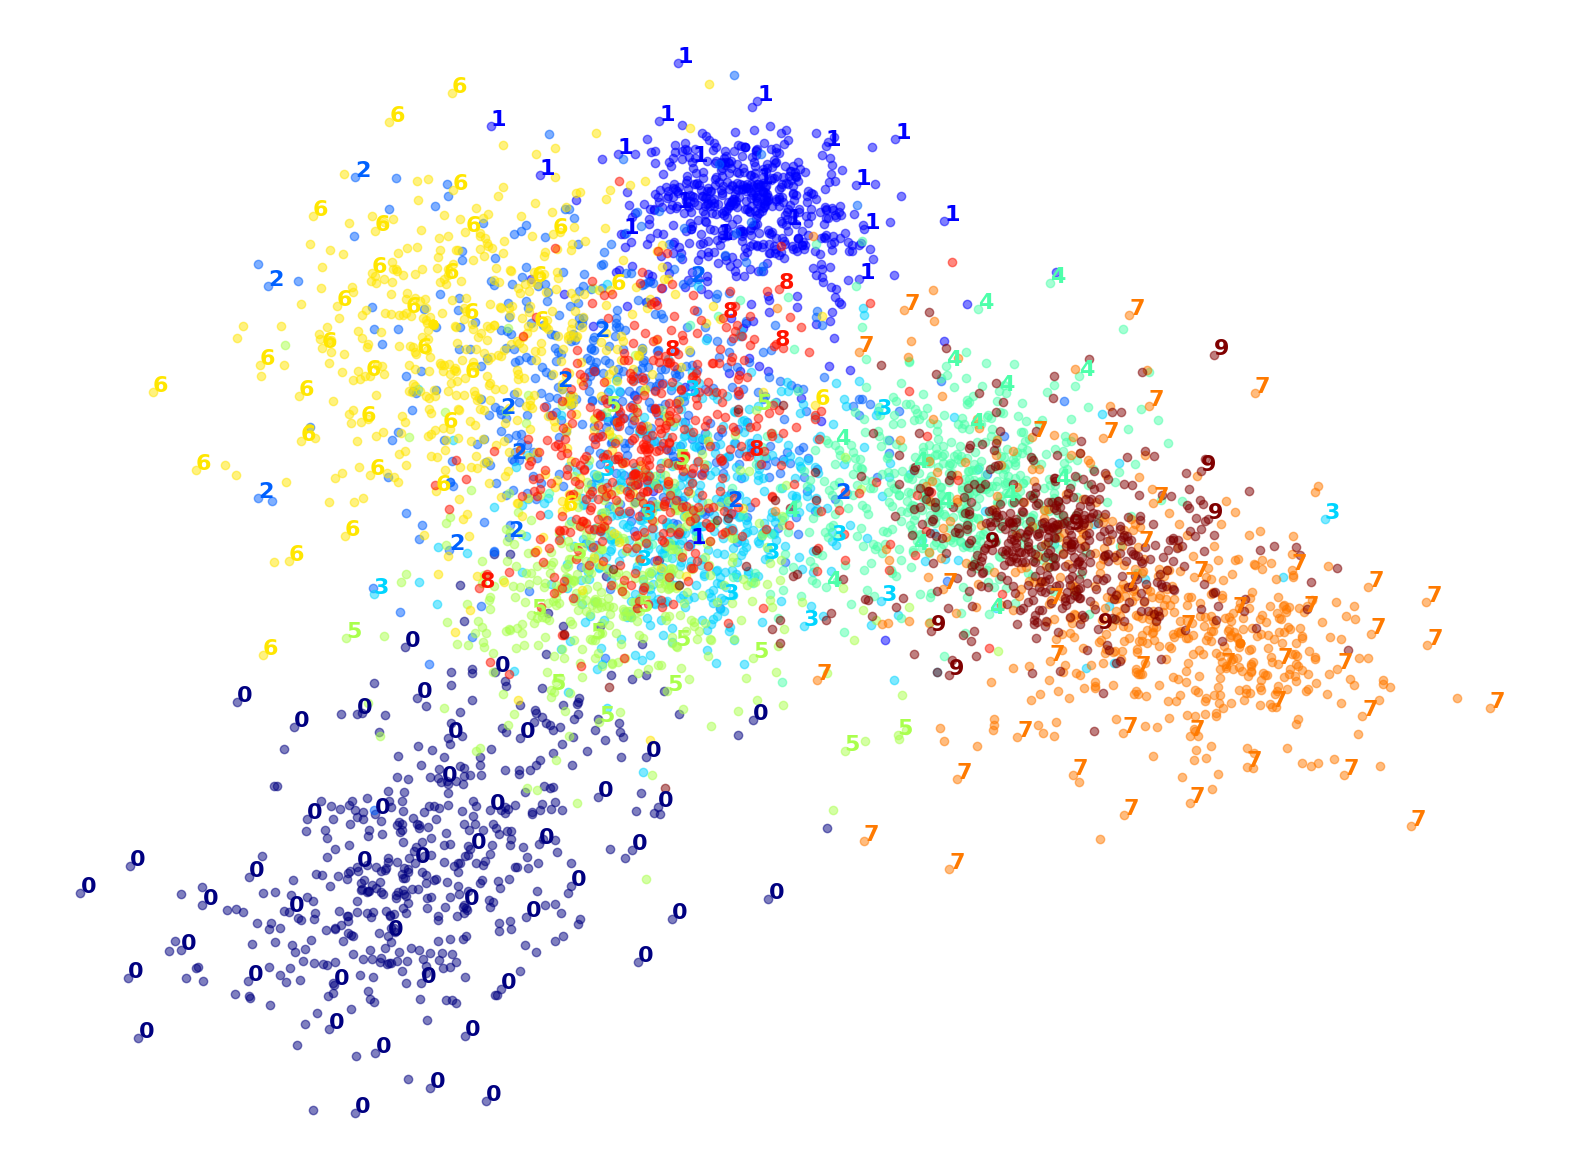

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_LDA = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
plot_digits(X_LDA, y, figsize=(20,15))
plt.show()